# Keras Model Creation Methods

In [1]:
from tensorflow import keras

## Sequential Method

### Sequential: Method1

In [9]:
model1 = keras.Sequential([
                           keras.layers.Dense(64, activation='relu', input_shape=(100,)),
                           keras.layers.Dense(10, activation='softmax')
])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                6464      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 7,114
Trainable params: 7,114
Non-trainable params: 0
_________________________________________________________________


### Sequential: Method2

In [17]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(64, activation='relu', name='first_layer'))
model2.add(keras.layers.Dense(10, activation='softmax', name='second_layer'))

# model2.build(input_shape=(None, 100))

model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 64)                6464      
                                                                 
 second_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 7,114
Trainable params: 7,114
Non-trainable params: 0
_________________________________________________________________


## Functional API Method

In [18]:
input_layer = keras.layers.Input(shape=(100,))
first_layer = keras.layers.Dense(64, activation='relu')(input_layer)
second_layer = keras.layers.Dense(10, activation='softmax')(first_layer)

model3 = keras.Model(inputs=input_layer, outputs=second_layer)

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_19 (Dense)            (None, 64)                6464      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 7,114
Trainable params: 7,114
Non-trainable params: 0
_________________________________________________________________


### Simple Example for Multi-input and Multi-output Model

In [19]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

x = keras.layers.Concatenate()([title, text_body, tags])
x = keras.layers.Dense(64, activation='relu')(x)

priority = keras.layers.Dense(1, activation='sigmoid')(x)
department = keras.layers.Dense(num_departments, activation='softmax')(x)

model4 = keras.Model(inputs=[title, text_body, tags],
                     outputs=[priority, department])

model4.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

### Plot Model Graph

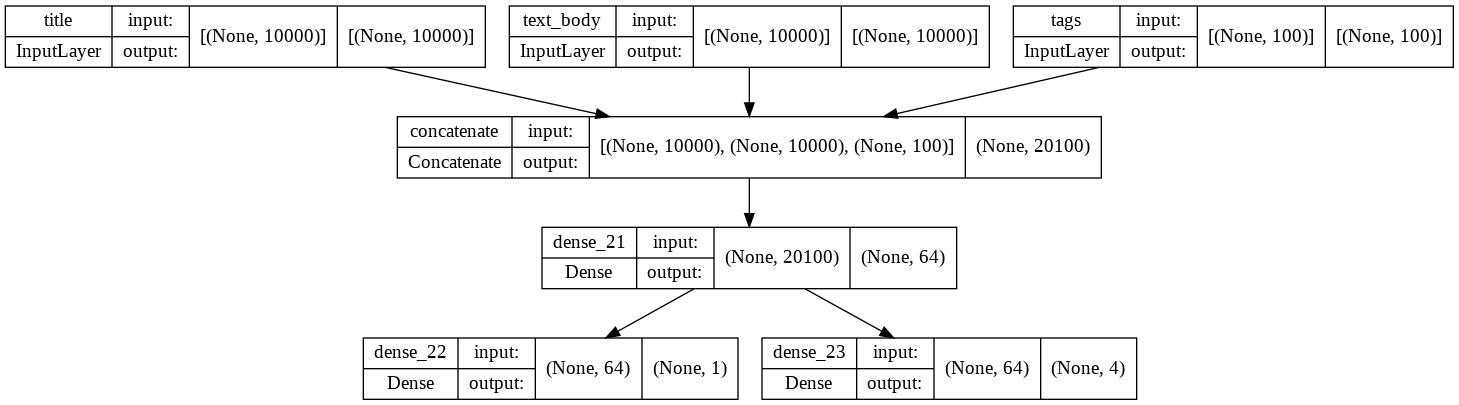

In [21]:
keras.utils.plot_model(model4, 'model.png', show_shapes=True)